In [1]:
from scripts.ambiente import Ambiente
from scripts.leitor import Leitor
from scripts.problems import Nrainhas, AlgebricFunction, FabricaDeRadios, Labirinto
from joblib import Parallel,delayed
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

%load_ext autoreload
%autoreload 2

    NRAINHAS

<Axes: >

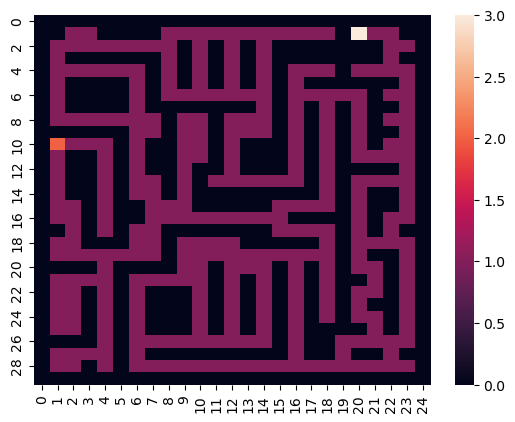

In [55]:
config = Leitor().loadJson('data\labirinto.json')
mapa = np.array(config['MAP'])
sns.heatmap(mapa)

In [72]:
problem = Labirinto()
ambiente = Ambiente(config,problem,False)

In [73]:
ambiente.population[0]

array([0.77046256, 0.56379277, 0.82935348, 0.88948003, 0.29874978,
       0.5393822 , 0.23947312, 0.97634677, 0.96120105, 0.97443172,
       0.78572823, 0.7723457 , 0.40277691, 0.43655152, 0.3849887 ,
       0.52753405, 0.7605292 , 0.66613934, 0.40405414, 0.58306165,
       0.79416544, 0.72241755, 0.46194932, 0.04153795, 0.23284062,
       0.2410987 , 0.89872437, 0.05528496, 0.71039473, 0.90924412,
       0.23523252, 0.42793797, 0.08032924, 0.19331825, 0.39901448,
       0.84434698, 0.3518338 , 0.47740909, 0.05102072, 0.86799062,
       0.93532895, 0.64784222, 0.65646291, 0.18499446, 0.63372031,
       0.64328171, 0.06804157, 0.89238976, 0.57490574, 0.01885919,
       0.32525588, 0.45452173, 0.70852175, 0.99967534, 0.06319542,
       0.00794877, 0.27571128, 0.18682359, 0.93132312, 0.49189835,
       0.42179243, 0.13642203, 0.38004786, 0.61549907, 0.55686819,
       0.32603192, 0.7161617 , 0.54763077, 0.29931855, 0.97077945,
       0.59336026, 0.05830174, 0.67492348, 0.03831095, 0.37324

In [74]:
mapa.shape

(30, 25)

<Axes: >

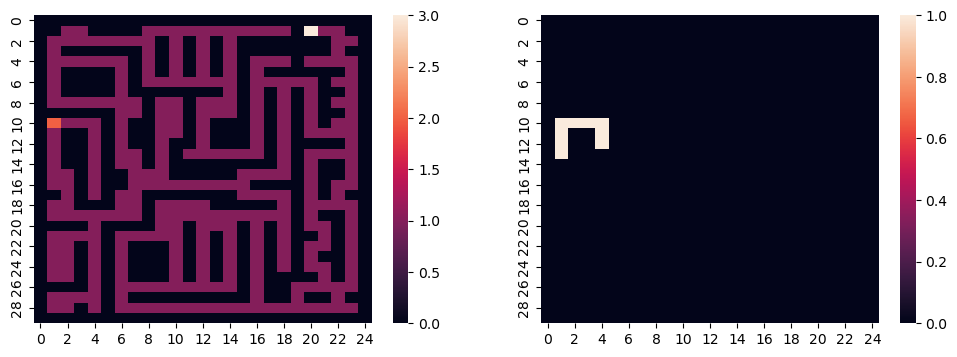

In [75]:
x = problem.decode(ambiente.population[0])
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.heatmap(mapa,ax=axes[0])
sns.heatmap(np.array([[1 if (i,j) in x else 0 for j in range(mapa.shape[1])] for i in range(mapa.shape[0])]), ax=axes[1])

In [77]:
problem.objective_function(x)

0.0

In [81]:
ambiente.run()

100%|██████████| 1000/1000 [00:57<00:00, 17.32it/s]


<Axes: >

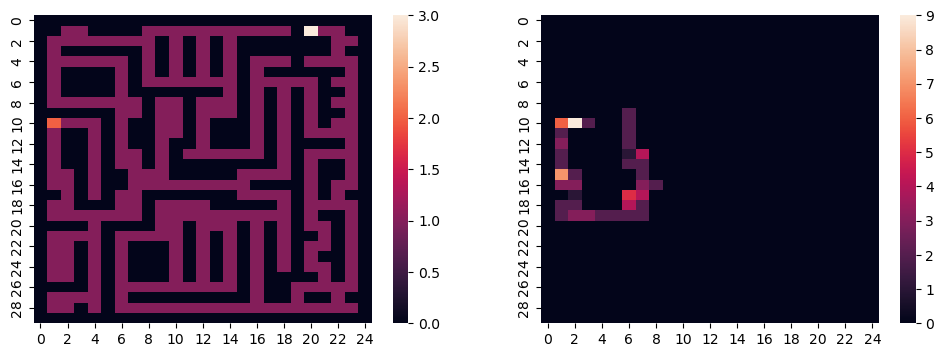

In [80]:
x = problem.decode(ambiente.population[0])
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.heatmap(mapa,ax=axes[0])
sns.heatmap(np.array([[problem.decode(ambiente.elite_population[0]).count((i,j)) for j in range(mapa.shape[1])] for i in range(mapa.shape[0])]), ax=axes[1])

<Axes: >

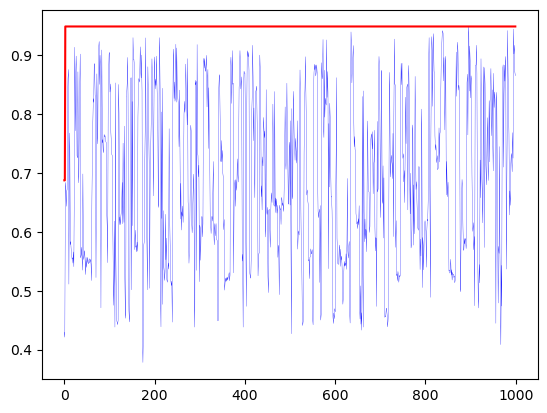

In [70]:
sns.lineplot(ambiente.results_mean,color='Blue',linewidth=0.2)
sns.lineplot(ambiente.results_best,color='Red')

In [4]:
config = Leitor().loadConfig('data/data_nrainhas64.txt')
problem = Nrainhas()
ambientes = [
    Ambiente(
        config=config,
        problem=problem,
        parallel=False,
    ) for _ in range(9)
]
def run(ambiente:Ambiente):
    ambiente.run()
    return ambiente

ambientes = Parallel(n_jobs=-1)(
    delayed(run)(ambiente) for ambiente in ambientes
)

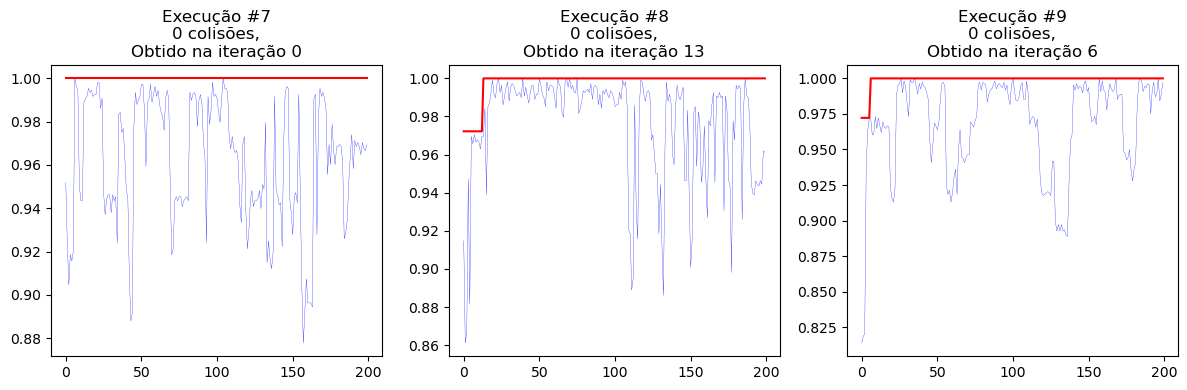

In [41]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
for i in range(3):
    j = i + 6
    colisoes = problem.objective_function(problem.decode(ambientes[i].elite_population[0]))
    posicao = np.array(ambientes[j].results_best).argmax()
    frase = 'Execução #'+str(j+1)+'\n'+str(colisoes)+' colisões' + ',\nObtido na iteração ' + str(posicao)
    sns.lineplot(ambientes[j].results_mean,color='Blue',ax=axes[i],linewidth=0.2)
    sns.lineplot(ambientes[j].results_best,color='Red',ax=axes[i]).set(title=frase)
plt.tight_layout()

3446.6666666666665 1361.909933390115


<Axes: >

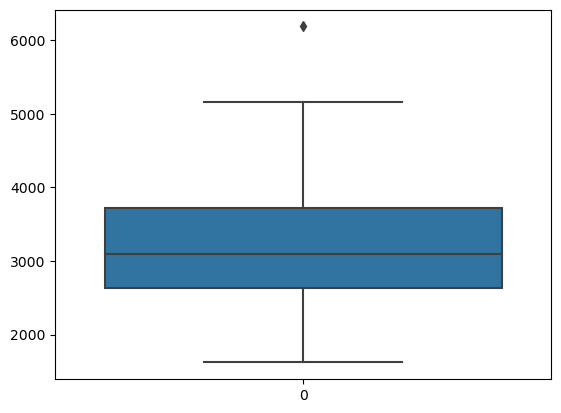

In [82]:
posicao = []
for i in range(9):
    posicao.append(np.array(ambientes[i].results_best).argmax())
posicao = np.array(posicao)
print(posicao.mean(), posicao.std())
sns.boxplot(posicao)

In [86]:
posicao = np.array([7303,6225,7916,6443,4716,4387,5788,5266,6112])

In [87]:
posicao.mean()

6165.0

In [79]:
df = df[['8 rainhas', '16 rainhas','32 rainhas','64 rainhas']]

[Text(0.5, 1.0, 'Número de iterações por configuração de N-rainhas')]

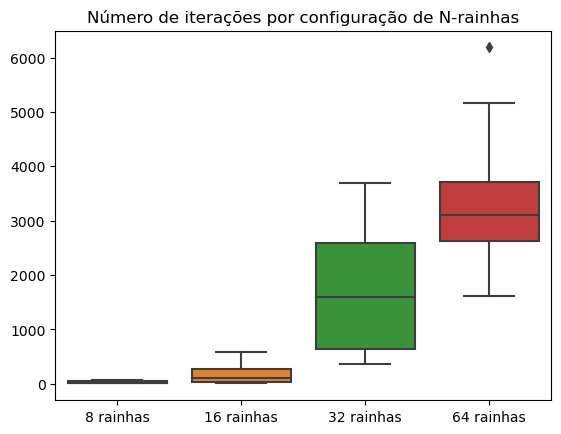

In [81]:
sns.boxplot(df).set(title='Número de iterações por configuração de N-rainhas')

    ESCREVER RUN

In [23]:
with open('data/runs/nrainhas128_10000_x10.ppkl','wb') as f:
    pickle.dump(ambientes,f)

PicklingError: Can't pickle <class 'scripts.problems.Nrainhas'>: it's not the same object as scripts.problems.Nrainhas

    CARREGAR RUN

In [19]:
mem_ambiente: list[Ambiente]
with open('data/runs/nrainhas128_5000_x10.ppkl','rb') as f:
    mem_ambiente = pickle.load(f)

    FUNÇÃO

<Axes: >

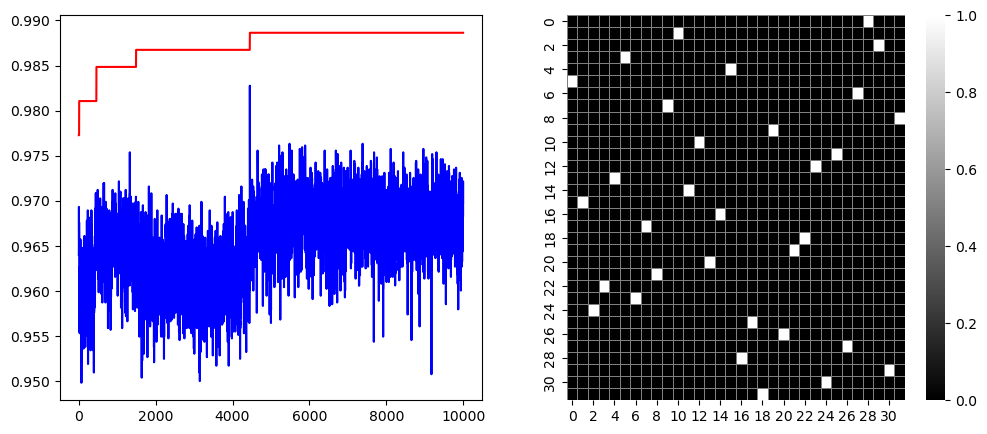

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.lineplot(ambiente.results_best,color='Red',ax=ax[0])
sns.lineplot(ambiente.results_mean,color='Blue',ax=ax[0])
sns.heatmap(problem.get_matrix(problem.decode(ambiente.elite_population[0])),linewidths=0.5,linecolor='Gray',cmap='gray',ax=ax[1])